# Finite State Machine Generator

이 notebook에서는 FSM (Finite State Machine)생성기를 사용하여 상태 시스템을 생성하는 방법을 보여준다. 우리가 만들 FSM은 Gray code counter이다. 카운터는 3 개의 상태 비트를 가지며 8 개의 상태를 통해 위 또는 아래로 카운트 할 수 있다. 카운터 출력은 Gray code되어 있다. 즉, 모든 상태의 출력 벡터와 다음 상태의 출력 벡터 사이에 단일 비트 전이만 있음을 의미한다.

### Step 1: Download the `logictools` overlay를 다운로드 한다.

In [1]:
from pynq.overlays.logictools import LogicToolsOverlay
from pynq.lib.logictools import FSMGenerator

logictools_olay = LogicToolsOverlay('logictools.bit')

### Step 2: Specify the FSM을 지정한다.

In [1]:
fsm_spec = {'inputs': [('reset','D0'), ('direction','D1')],
            'outputs': [('bit2','D3'), ('bit1','D4'), ('bit0','D5')],
            'states': ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'],
            'transitions': [['01', 'S0', 'S1', '000'],
                            ['00', 'S0', 'S7', '000'],
                            ['01', 'S1', 'S2', '001'],
                            ['00', 'S1', 'S0', '001'],
                            ['01', 'S2', 'S3', '011'],
                            ['00', 'S2', 'S1', '011'],
                            ['01', 'S3', 'S4', '010'],
                            ['00', 'S3', 'S2', '010'],
                            ['01', 'S4', 'S5', '110'],
                            ['00', 'S4', 'S3', '110'],
                            ['01', 'S5', 'S6', '111'],
                            ['00', 'S5', 'S4', '111'],
                            ['01', 'S6', 'S7', '101'],
                            ['00', 'S6', 'S5', '101'],
                            ['01', 'S7', 'S0', '100'],
                            ['00', 'S7', 'S6', '100'],                            
                            ['1-', '*',  'S0', '']]}   

__Notes on the FSM specification format__

![](./images/fsm_spec_format.png)

### Step 3: Instantiate the FSM generator object FSM 객체를 객체화한다.

In [3]:
fsm_generator = logictools_olay.fsm_generator

### Step 4: 추적 분석기를 사용하기위한 셋업
이 notebook에서는 추적 분석기를 사용하여 FSM의 입력과 출력을 확인한다.

사용자는`trace ()`메소드를 호출하여 추적 분석기 사용 여부를 선택할 수 있습니다.

In [4]:
fsm_generator.trace()

### Step 5: FSM 생성기를 셋업한다.
FSM 생성기는 기본 주파수인 10MHz에서 작동한다. 이것은 `setup ()`메소드에서`frequency` 인자를 사용하여 수정할 수 있다.
The FSM generator will work at the default frequency of 10MHz. This can be modified using a `frequency` argument in the `setup()` method.

In [5]:
fsm_generator.setup(fsm_spec)

__Display the FSM 상태 다이어그램을 표시한다.__   
이 메소드는 생성기가 올바르게 설정된 후에 호출해야합니다.

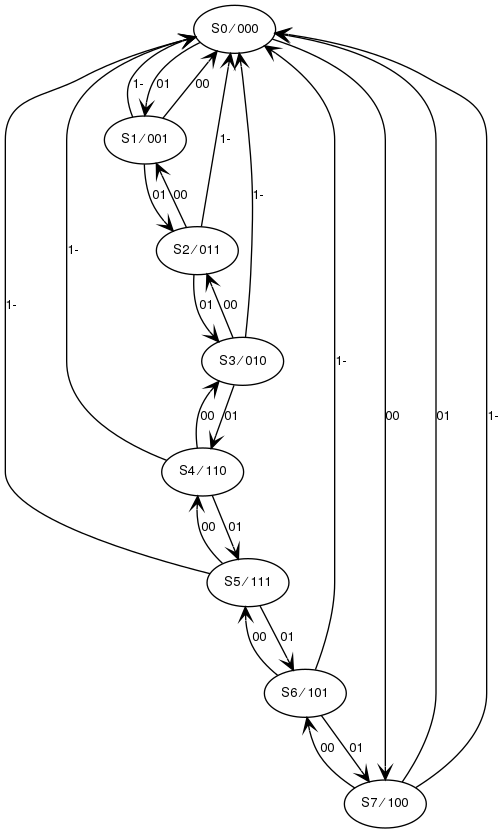

In [6]:
fsm_generator.show_state_diagram()

__PYNQ 보드에 FSM 입력을 셋업한다.__
* 아래 그림과 같이 리셋 및 방향 입력이 PYNQ 보드에 올바르게 배선되어 있는지 확인한다.
    * AR0를 GND에 연결한다.
    * AR1을 3.3V에 연결한다.

![](./images/fsm_wiring.png)

__Notes:__
    
* 3 비트 gray code counter는 상태가 오름차순 또는 내림차순으로 000에서 100까지 계산되는 up-down, wrap-around 카운터이다.

* 리셋 입력은 Arduino 커넥터의 핀 AR0에 연결된다.
    * 정상 작동에 쓰이는 리셋 입력을 GND에 연결한다. 
    * 리셋 입력이 로직 1(3.3V)로 설정되면 카운터는 상태 000으로 리셋된다.
    

* 방향 입력은 Arduino 커넥터의 핀 AR1에 연결된다.
    * 방향이 로직 0으로 설정되면 카운터는 카운트 다운한다.
    * 반대로 방향 입력이 로직 1로 설정되면 카운터는 카운트 업한다.

### Step 6: Run and display waveform을 실행하고 결과를 보여준다.

run () 메소드는 모든 샘플을 실행하고, show_waveform () 메소드는 파형을 표시하는 데 사용된다.

In [7]:
fsm_generator.run()
fsm_generator.show_waveform()

#### 예상되는 Gray code counter 시퀀스에 대한 추적 출력 확인한다.

| State | FSM output bits: bit2, bit1, bit0        |
|:-----:|:----------------------------------------:|
| s0    | 000                                      |
| s1    | 001                                      |
| s2    | 011                                      |
| s3    | 010                                      |
| s4    | 110                                      |
| s5    | 111                                      |
| s6    | 101                                      |
| s7    | 100                                      |




### Step 7: Stop the FSM generator의 작동을 멈춘다.
`stop()`을 호출하면 출력 핀의 논리 값이 지워진다. 그러나 파형은 FSM 인스턴스에 로컬로 기록된다.

In [8]:
fsm_generator.stop()